In [17]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor


In [3]:
# Make the dataset
N = 1_000
X = np.random.random((N, 2)) * 6 - 3  # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])  # y = cos(2x1) + cos(3x2)


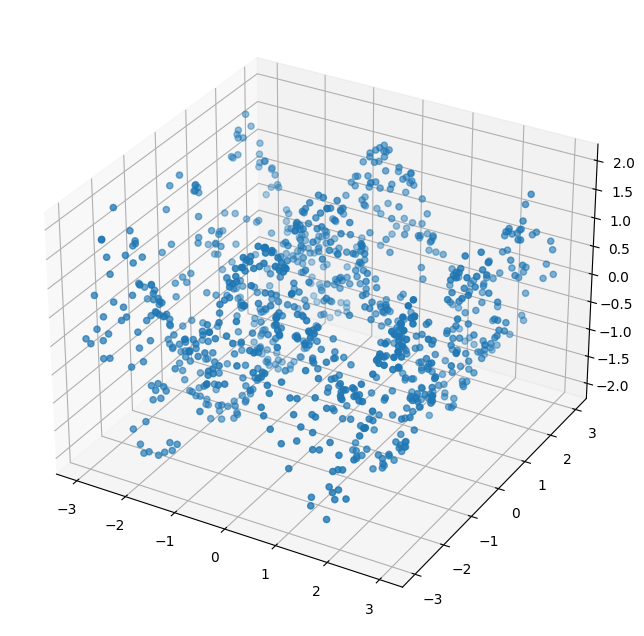

In [4]:
# plot it
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()


In [5]:
# SVR
model = SVR(C=100.)
model.fit(X, Y)


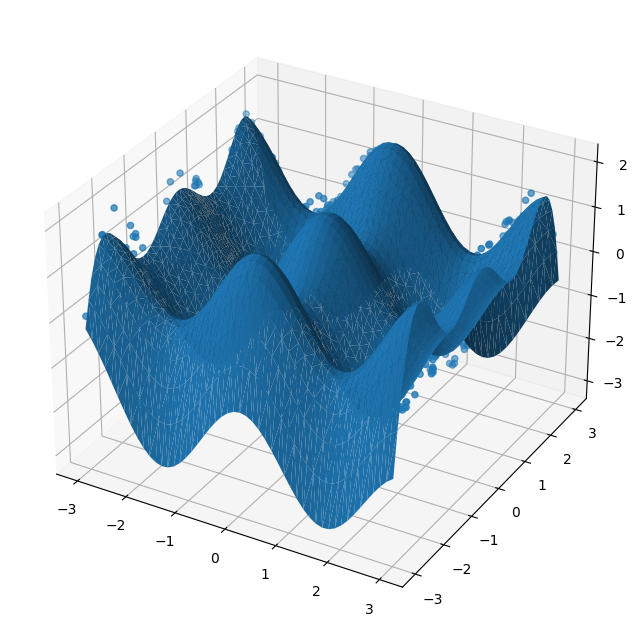

In [6]:
# Plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


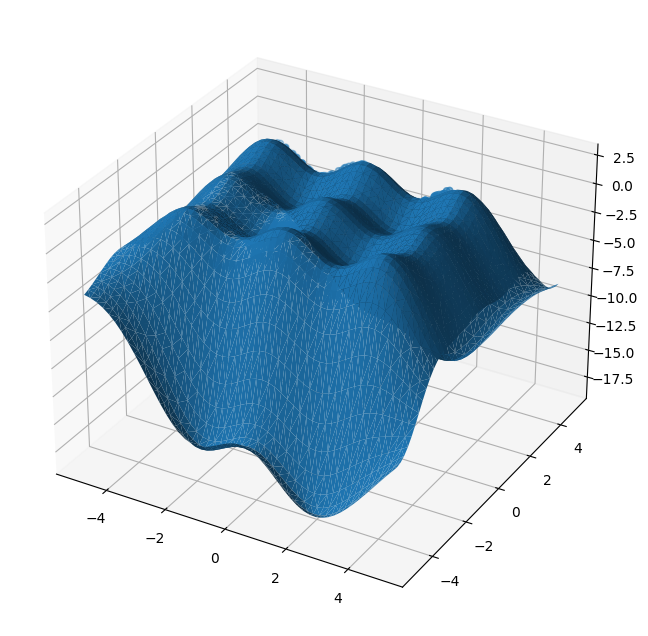

In [7]:
# can it extrapolate?
# plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


Sometimes people ask: isn't that the true function?

NO! The true function is given above:

$$y = cos(2x_1) + cos(3x_2)$$

Don't forget it this time!

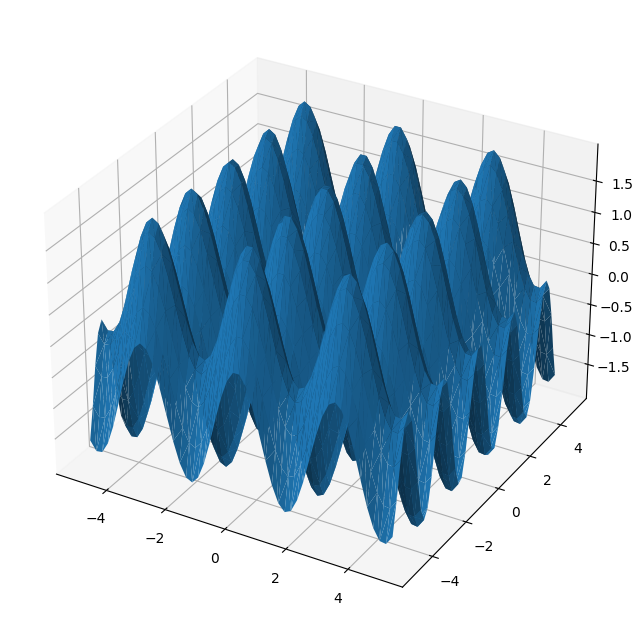

In [8]:
# What the true function looks like
# Can it extrapolate?
# plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
# ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Ytrue = np.cos(2*Xgrid[:, 0]) + np.cos(3*Xgrid[:, 1])  # <--- true function
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Ytrue,
                linewidth=0.2, antialiased=True)
plt.show()


## Random Forest Regressor

In [9]:
model = RandomForestRegressor()
model.fit(X, Y)


RandomForestRegressor()

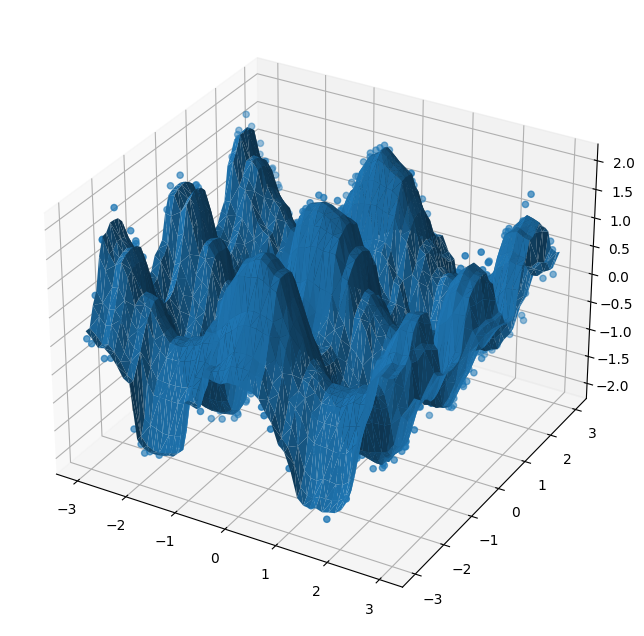

In [10]:
# plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


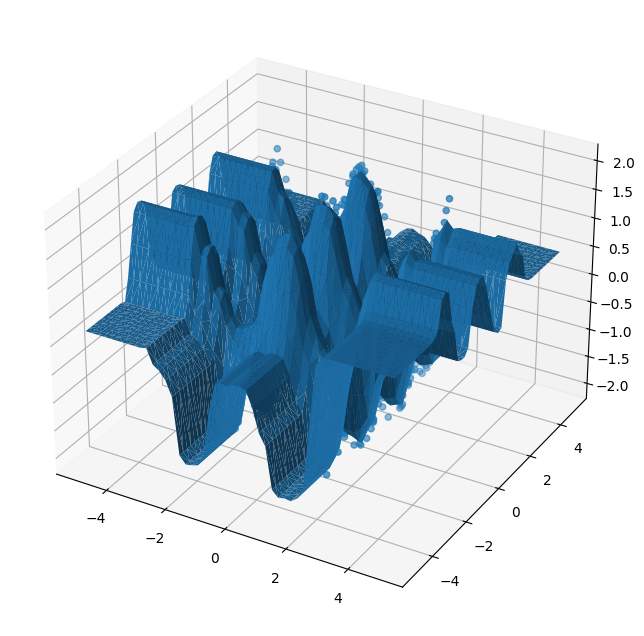

In [11]:
# can it extrapolate?
# plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


## Multi-Layer Perceptron Regressor

In [14]:
model = MLPRegressor(hidden_layer_sizes=128, alpha=0., learning_rate_init=0.01)
model.fit(X, Y)


MLPRegressor(alpha=0.0, hidden_layer_sizes=128, learning_rate_init=0.01)

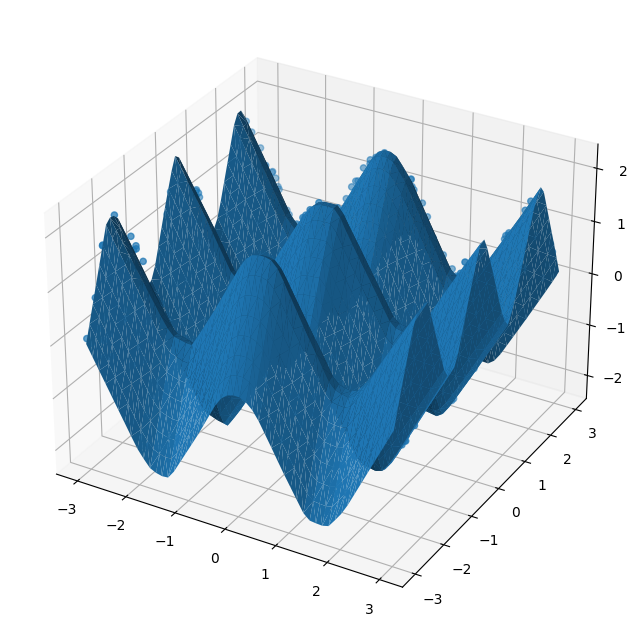

In [15]:
# plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


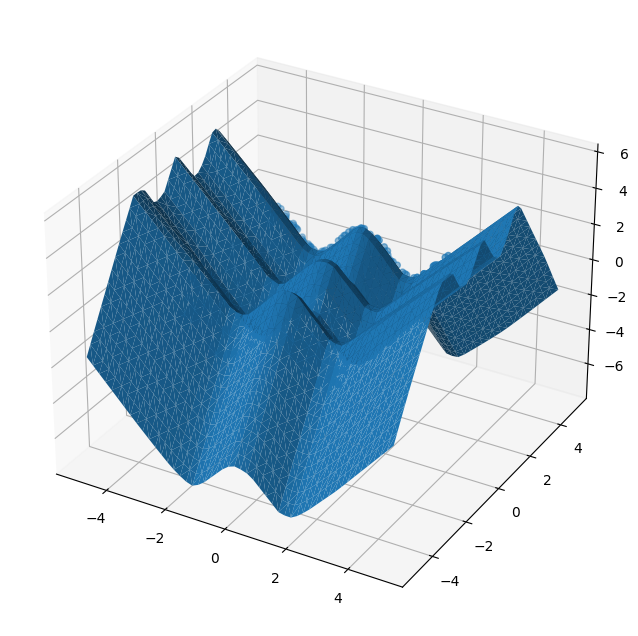

In [16]:
# can it extrapolate?
# plot the prediction surface
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat,
                linewidth=0.2, antialiased=True)
plt.show()


## Stock Prices

In [18]:
df = pd.read_csv("../Data/SPY.csv", index_col="Date", parse_dates=True)
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [19]:
df.shape


(2263, 6)

In [20]:
train = df.iloc[:2000]["Close"].to_numpy()
test = df.iloc[2000:]["Close"].to_numpy()


In [21]:
Xtrain = []
for t in range(len(train) - 1):
    x0 = train[t]
    x1 = train[t+1]
    Xtrain.append((x0, x1))

Xtest = []
for t in range(len(test) - 1):
    x0 = test[t]
    x1 = test[t+1]
    Xtest.append((x0, x1))


In [22]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)


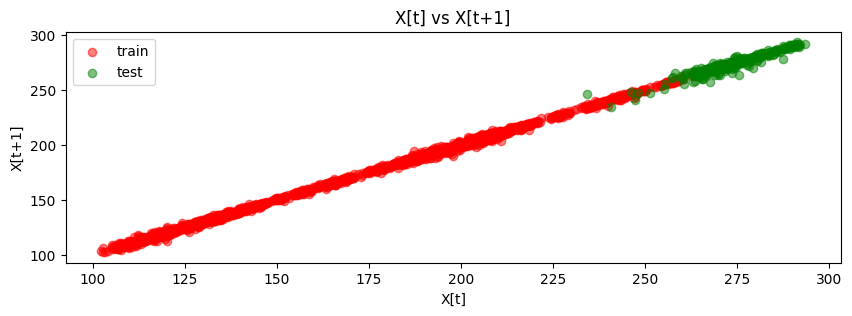

In [23]:
plt.figure(figsize=(10, 3))
plt.xlabel("X[t]")
plt.ylabel("X[t+1]")
plt.title("X[t] vs X[t+1]")
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c="r", alpha=0.5, label="train")
plt.scatter(Xtest[:, 0], Xtest[:, 1], c="g", alpha=0.5, label="test")
plt.legend()
plt.show()


In [ ]:
# Exercise: if you believe that "min-max scaling" will help, try it
# (though it should be obvious why it yields the same result)
